# Part 1 -  Data Pre-Processing

## 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

from sklearn.model_selection import train_test_split
from datetime import datetime

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## 1.2 Loading The Data

In [2]:
raw_data = pd.read_excel('loan_data.xlsx')
df = raw_data.copy()

## 1.3 Understanding The Dataframe

In [3]:
df.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,20-03-1984,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022
1,469638,01-12-1977,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023
2,489282,18-09-1997,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025
3,490443,03-01-1987,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026
4,331469,15-09-1989,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027


In [4]:
df.shape

(20074, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTOMER_NO    20074 non-null  int64         
 1   BIRTH_DATE     20074 non-null  object        
 2   BEGIN_DATE     20074 non-null  datetime64[ns]
 3   END_DATE       20074 non-null  datetime64[ns]
 4   CLOSE_DATE     8744 non-null   datetime64[ns]
 5   BRANCH_NAME    20074 non-null  object        
 6   INTEREST_RATE  20074 non-null  float64       
 7   PRODUCT_NAME   20074 non-null  object        
 8   AMOUNT         20074 non-null  float64       
 9   REMAIN_AMOUNT  20074 non-null  float64       
 10  CATEGORY       20074 non-null  object        
 11  GSM_NO         19036 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [6]:
df.describe()

,CUSTOMER_NO,BEGIN_DATE,END_DATE,CLOSE_DATE,INTEREST_RATE,AMOUNT,REMAIN_AMOUNT
count,20074.000000,20074,20074,8744,20074.000000,20074.000000,20074.000000
mean,518376.961144,2022-11-27 16:06:58.929958912,2025-07-12 18:27:22.004583168,2023-02-06 19:14:46.001829888,16.226243,9938.329899,4292.121747
min,12702.000000,2021-01-14 00:00:00,2024-02-15 00:00:00,2021-03-09 00:00:00,4.000000,300.000000,0.000000
25%,404840.500000,2022-05-12 00:00:00,2024-09-12 00:00:00,2022-09-09 00:00:00,14.900000,4000.000000,0.000000
50%,519707.500000,2023-01-10 00:00:00,2025-05-19 00:00:00,2023-04-06 00:00:00,16.000000,7000.000000,1015.275000
75%,665035.000000,2023-08-04 00:00:00,2026-03-16 00:00:00,2023-08-31 00:00:00,17.000000,13000.000000,5787.732500
max,824158.000000,2023-12-30 00:00:00,2028-11-30 00:00:00,2023-12-30 00:00:00,29.000000,200000.000000,105080.830000
std,184675.378399,NaN,NaN,NaN,2.305223,9229.274894,7251.010323


In [7]:
df.describe(include=['object'])

,BIRTH_DATE,BRANCH_NAME,PRODUCT_NAME,CATEGORY,GSM_NO
count,20074,20074,20074,20074,19036
unique,9692,13,4,1,15513
top,10-07-1971,MX,İstehlak kredit (Cash),GB,-1234
freq,17,3416,14321,20074,18


In [8]:
df.isnull().sum()

CUSTOMER_NO          0
BIRTH_DATE           0
BEGIN_DATE           0
END_DATE             0
CLOSE_DATE       11330
BRANCH_NAME          0
INTEREST_RATE        0
PRODUCT_NAME         0
AMOUNT               0
REMAIN_AMOUNT        0
CATEGORY             0
GSM_NO            1038
dtype: int64

## 1.4 Data Cleaning

#### 1.4.1 Removing Duplicates

In [9]:
df.drop_duplicates(inplace=True)

#### 1.4.2 Modifying The Data Types

In [10]:
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], format='%d-%m-%Y', errors='coerce')
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'], format='%Y-%m-%d', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%Y-%m-%d', errors='coerce')
df['CLOSE_DATE'] = pd.to_datetime(df['CLOSE_DATE'], format='%Y-%m-%d', errors='coerce')

df["CUSTOMER_NO"] = df["CUSTOMER_NO"].astype(str)

df["GSM_NO"] = df["GSM_NO"].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTOMER_NO    20074 non-null  object        
 1   BIRTH_DATE     20074 non-null  datetime64[ns]
 2   BEGIN_DATE     20074 non-null  datetime64[ns]
 3   END_DATE       20074 non-null  datetime64[ns]
 4   CLOSE_DATE     8744 non-null   datetime64[ns]
 5   BRANCH_NAME    20074 non-null  object        
 6   INTEREST_RATE  20074 non-null  float64       
 7   PRODUCT_NAME   20074 non-null  object        
 8   AMOUNT         20074 non-null  float64       
 9   REMAIN_AMOUNT  20074 non-null  float64       
 10  CATEGORY       20074 non-null  object        
 11  GSM_NO         20074 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 1.8+ MB


#### 1.4.3 Correcting Format and Handling Missing Values:

In [12]:
df['GSM_NO'].unique()

array(['994758000022', '994758000023', '994758000025', ...,
       '994334004883', '994334004884', '994334004885'], dtype=object)

In [13]:
df['GSM_NO'].value_counts()

GSM_NO
nan               1038
-1234               18
994758001159        17
555-987_6543        17
(123)-456-7890      10
                  ... 
994767002988         1
994767002989         1
994767002990         1
994767002991         1
994334004885         1
Name: count, Length: 15514, dtype: int64

In [14]:
prefixes = ['99475', '99476', '99433']

df.loc[~df['GSM_NO'].str.startswith(tuple(prefixes)), "GSM_NO"] = np.NaN
df.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027


## 1.5 Data Transformation (Feature Engineering)

In [15]:
df['Age'] = df['BEGIN_DATE'].dt.year - df['BIRTH_DATE'].dt.year

df['Loan_Period_Months'] = ((df['END_DATE'] - df['BEGIN_DATE']).dt.days // 30)

df.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,Age,Loan_Period_Months
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022,37,36
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023,44,45
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025,24,36
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026,34,36
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027,32,36


# Part 2 - Exploratory Data Analysis (EDA) 

## 2.1 Univariate Analysis for Numerical Variables

In [16]:
df.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,Age,Loan_Period_Months
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022,37,36
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023,44,45
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025,24,36
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026,34,36
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027,32,36


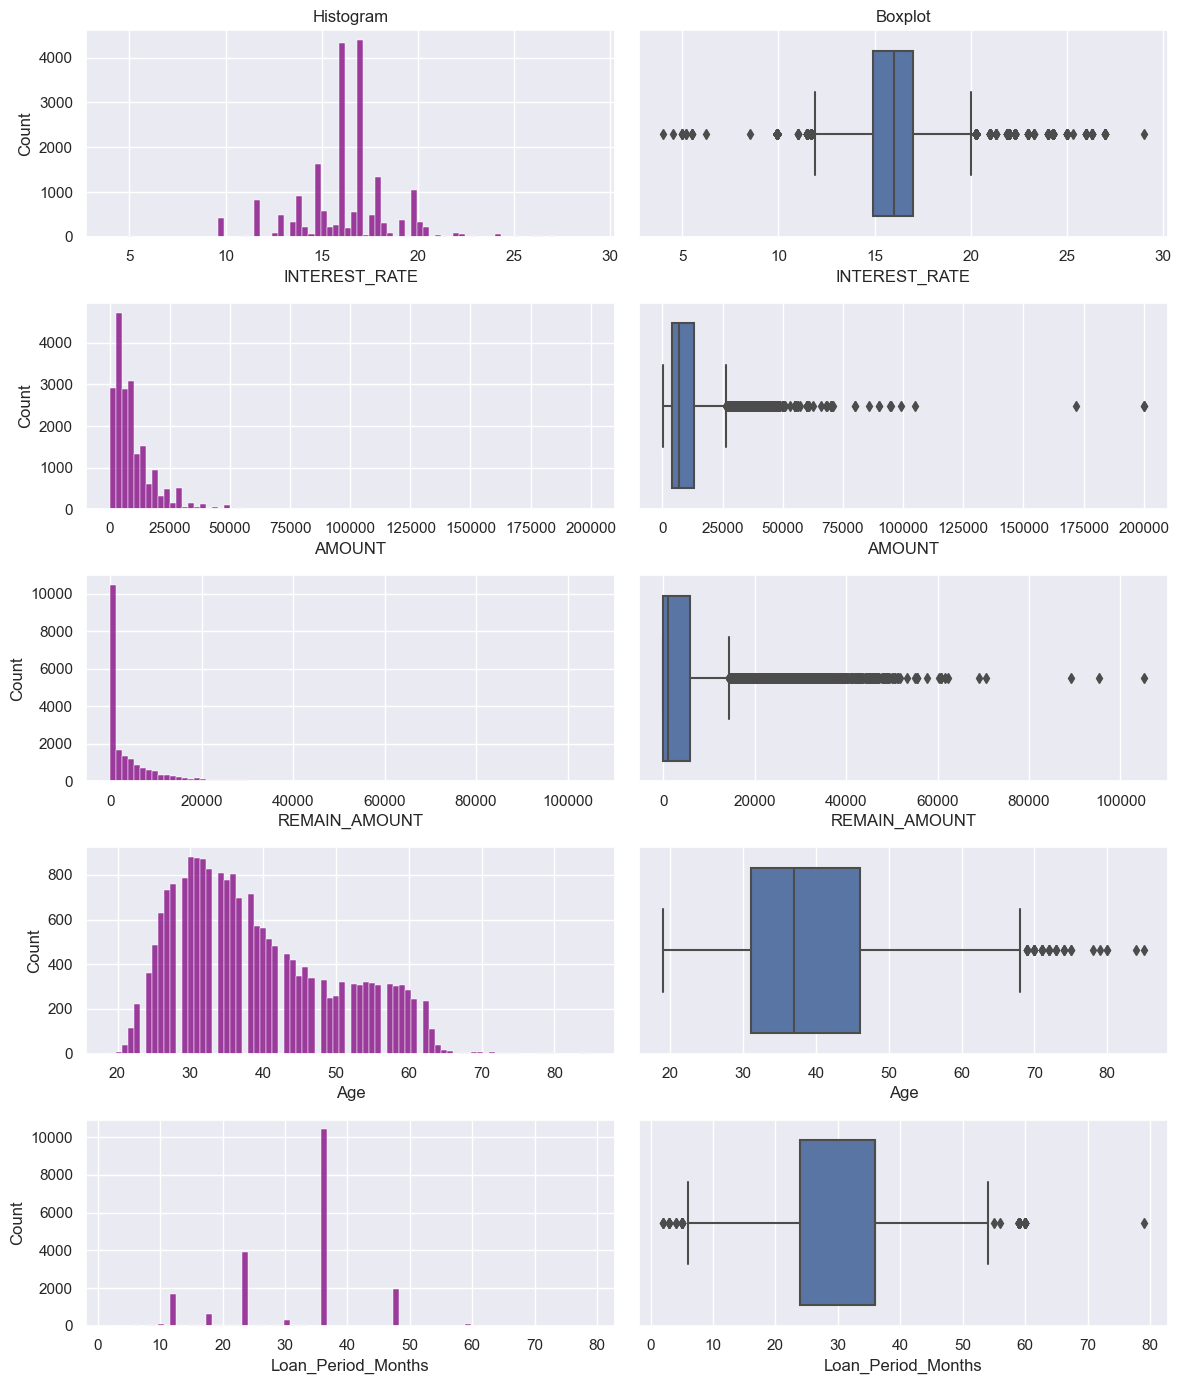

In [17]:
features = ['INTEREST_RATE', 'AMOUNT','REMAIN_AMOUNT', 'Age', 'Loan_Period_Months']

fig, axs = plt.subplots(5, 2, figsize=(12, 14))


axs[0, 0].set_title("Histogram")
axs[0, 1].set_title("Boxplot")

for i in enumerate(features):
    sns.histplot(df, x=i[1], bins=80,  color='purple',kde=False, ax=axs[i[0], 0])
    sns.boxplot(df, x=i[1], ax=axs[i[0], 1])

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

plt.tight_layout()

plt.show()

## 2.2 Univariate Analysis for Categorical Variables

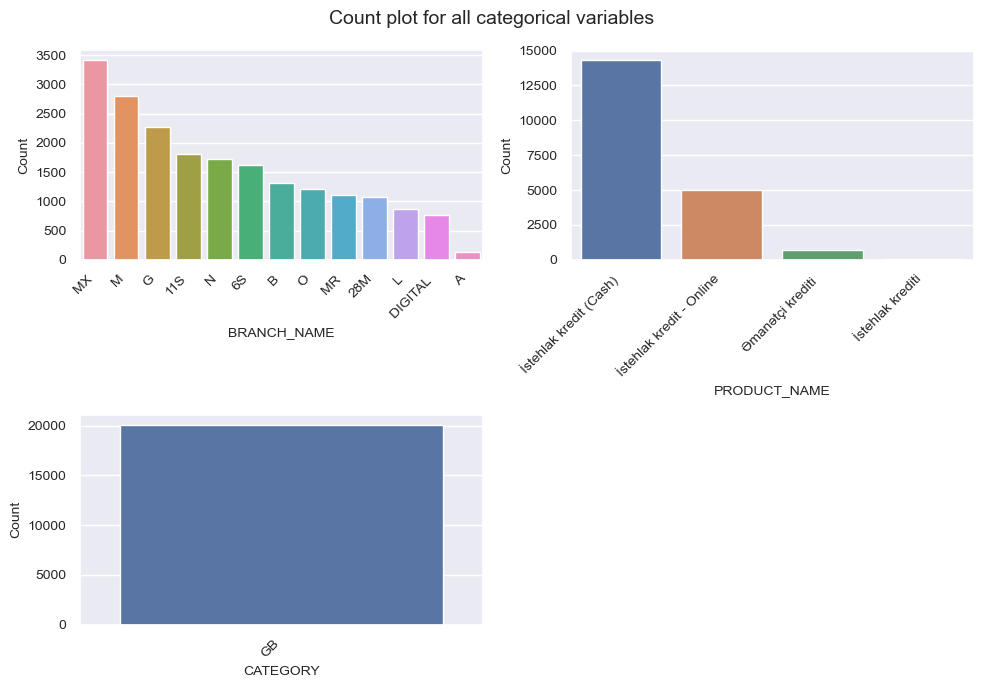

In [18]:
fig, axes = plt.subplots(2,2, figsize = (10, 7))

fig.suptitle('Count plot for all categorical variables', fontsize=14)

sns.countplot(ax = axes[0,0], x = 'BRANCH_NAME', data = df, 
              order = df['BRANCH_NAME'].value_counts().index);
sns.countplot(ax = axes[0,1], x = 'PRODUCT_NAME', data = df, 
              order = df['PRODUCT_NAME'].value_counts().index);
sns.countplot(ax = axes[1,0], x = 'CATEGORY', data = df, 
              order = df['CATEGORY'].value_counts().index);

axes[1, 1].set_axis_off()

plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

for ax in axes.flatten():
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

max_count = axes[0,0].get_yticks()[-1]
axes[0,0].set_yticks(range(0, int(max_count) , 500))

plt.tight_layout()

plt.show()

## 2.3 Bivariate Analysis for Numerical Variables

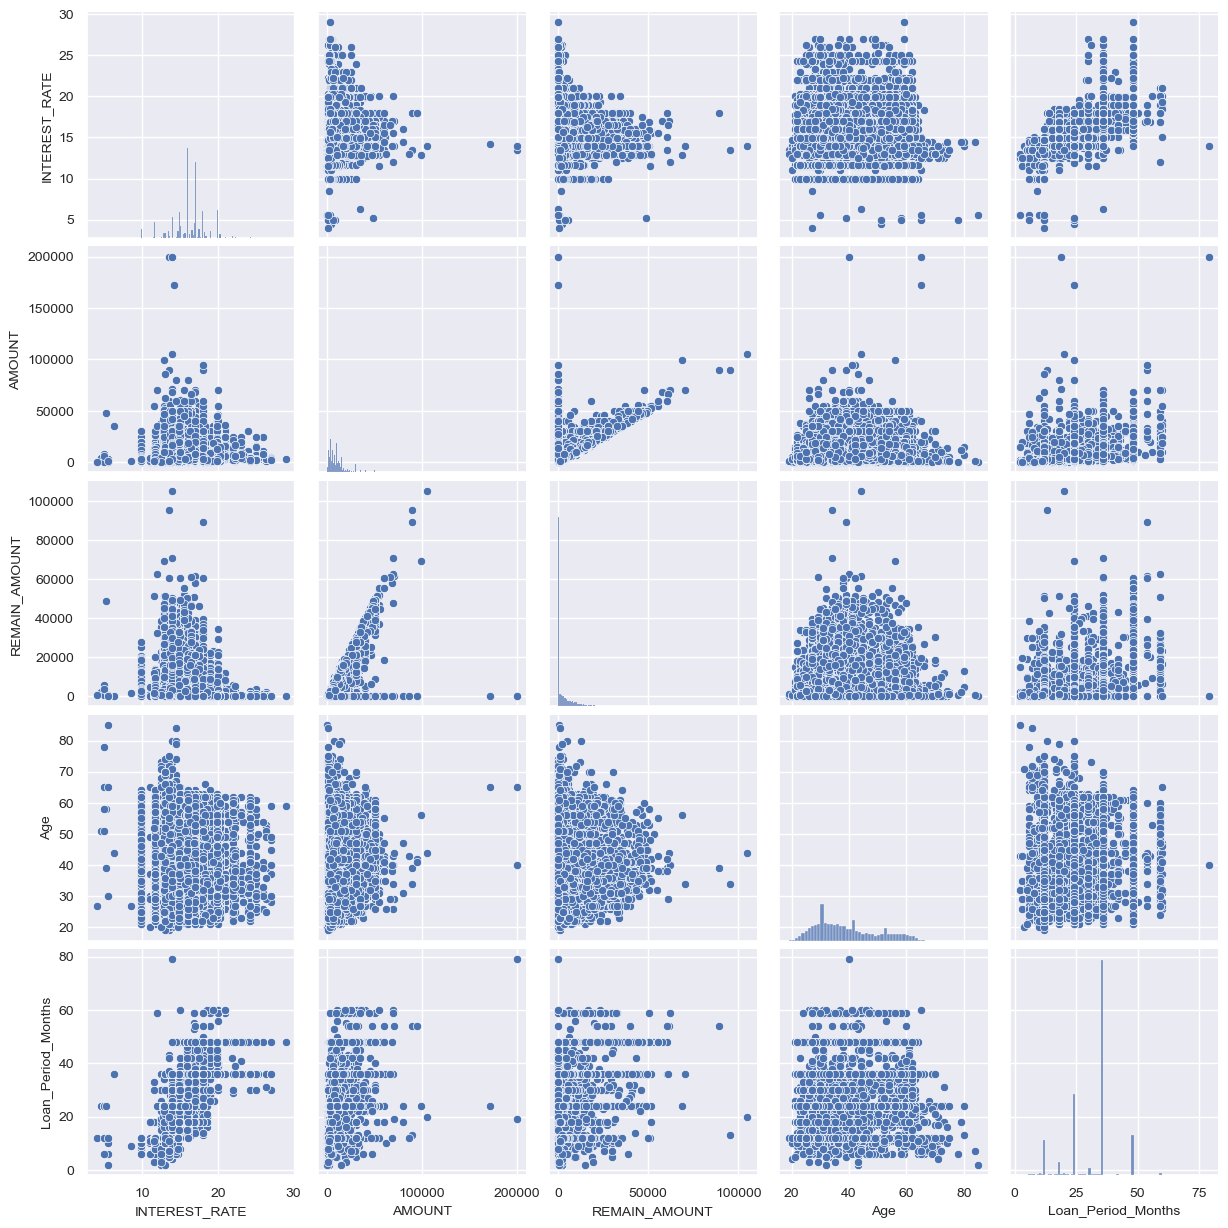

In [19]:
sns.pairplot(df)
plt.show()

## 2.4 Bivariate Analysis for Numerical and Categorical Variables

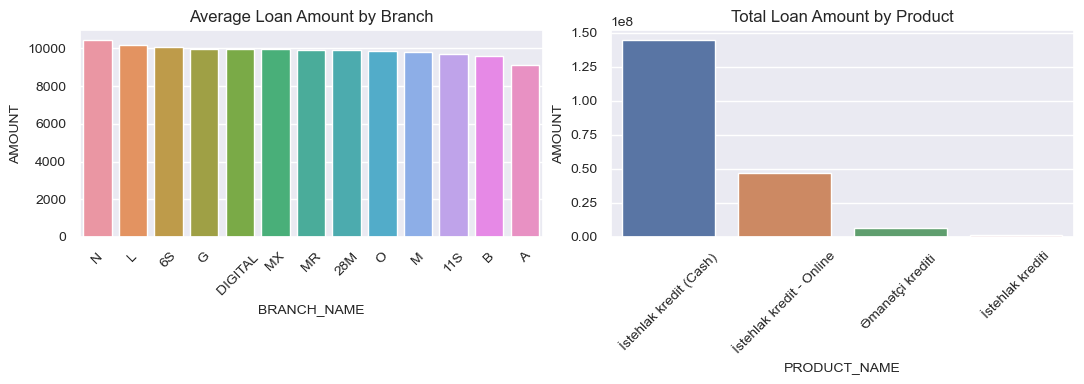

In [20]:
fig, axarr = plt.subplots(1, 2, figsize=(11, 4))


grouped_branch = df.groupby('BRANCH_NAME')['AMOUNT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax = axarr[0], x='BRANCH_NAME', y='AMOUNT', data=grouped_branch)

axarr[0].set_title("Average Loan Amount by Branch", fontsize=12)
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=45)


grouped_branch = df.groupby('PRODUCT_NAME')['AMOUNT'].sum().sort_values(ascending=False).reset_index()

sns.barplot(ax = axarr[1], x='PRODUCT_NAME', y='AMOUNT', data=grouped_branch)
axarr[1].set_title("Total Loan Amount by Product", fontsize=12)
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 2.5 Multivariate Analysis

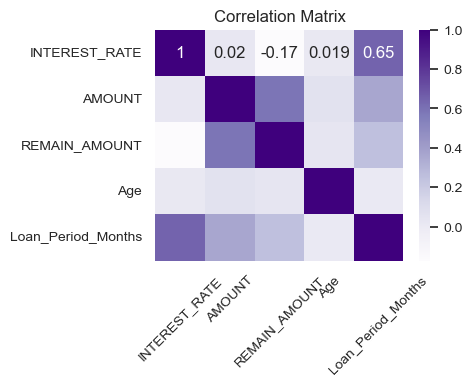

In [21]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="Purples")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.corr(numeric_only=True)

,INTEREST_RATE,AMOUNT,REMAIN_AMOUNT,Age,Loan_Period_Months
INTEREST_RATE,1.000000,0.020491,-0.172327,0.019356,0.646048
AMOUNT,0.020491,1.000000,0.586782,0.064206,0.366114
REMAIN_AMOUNT,-0.172327,0.586782,1.000000,0.034956,0.251404
Age,0.019356,0.064206,0.034956,1.000000,0.008549
Loan_Period_Months,0.646048,0.366114,0.251404,0.008549,1.000000


## 2.6 Yearly and monthly sales amount and count (using pivot_table func.)

### Without using pivot_table

In [23]:
df['Begin_Date_Year'] = df['BEGIN_DATE'].dt.year
df['Begin_Date_Month'] = df['BEGIN_DATE'].dt.month

df["Begin_Date_Year"] = df["Begin_Date_Year"].astype(str)
df["Begin_Date_Month"] = df["Begin_Date_Month"].astype(str)

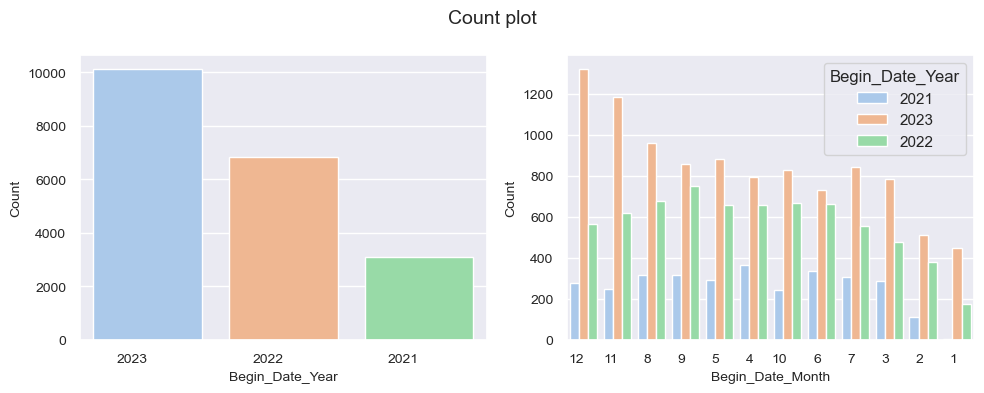

In [26]:
fig, axes = plt.subplots(1,2, figsize = (10, 4))

fig.suptitle('Count plot', fontsize=14)

sns.countplot(ax = axes[0], x = 'Begin_Date_Year', data = df, 
              order = df['Begin_Date_Year'].value_counts().index, palette='pastel')
sns.countplot(ax = axes[1], x = 'Begin_Date_Month', data = df, 
              order = df['Begin_Date_Month'].value_counts().index, hue="Begin_Date_Year", palette='pastel')

plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

for ax in axes.flatten():
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

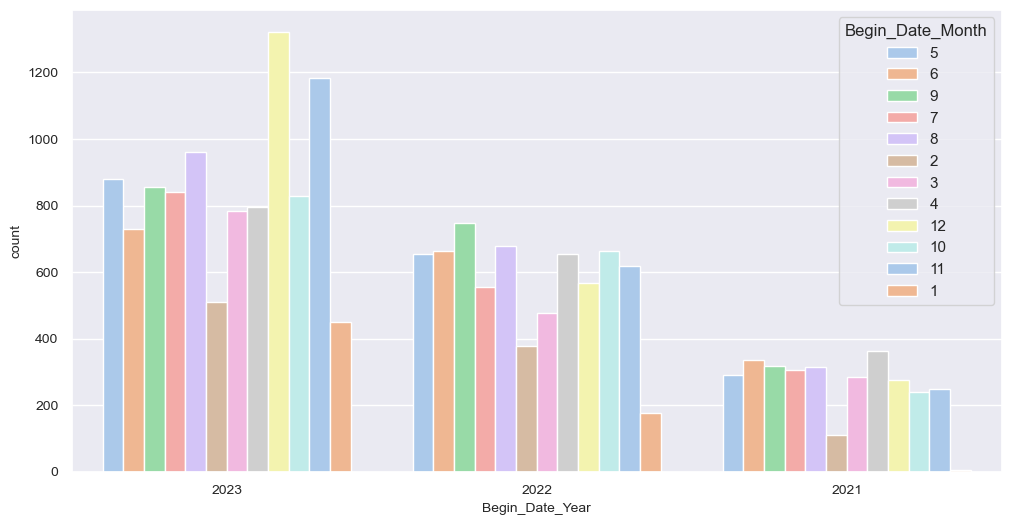

In [25]:
fig, axes = plt.subplots(1,1, figsize = (12, 6))

sns.countplot(ax = axes, x = 'Begin_Date_Year', data = df, 
              order = df['Begin_Date_Year'].value_counts().index, hue="Begin_Date_Month", palette='pastel');

plt.show()

### By using pivot_table

In [66]:
begin_date_yearly_pivot = pd.pivot_table(df, values='AMOUNT', index='Begin_Date_Year', aggfunc={'AMOUNT': ['sum', 'count']})
begin_date_monthly_pivot = pd.pivot_table(df, values='AMOUNT', index=['Begin_Date_Year', 'Begin_Date_Month'], aggfunc={'AMOUNT': ['sum', 'count']})

In [67]:
begin_date_yearly_pivot

,count,sum
Begin_Date_Year,,
2021,3098,32825320.0
2022,6837,64071831.0
2023,10139,102604883.4


In [68]:
begin_date_monthly_pivot

count         sum
Begin_Date_Year Begin_Date_Month                   
2021            1                     5     77600.0
                10                  241   2822790.0
                11                  249   2806580.0
                12                  277   2831450.0
                2                   112   1128840.0
                3                   286   2586660.0
                4                   363   3583040.0
                5                   291   2750390.0
                6                   337   3497820.0
                7                   305   3260700.0
                8                   314   3662070.0
                9                   318   3817380.0
2022            1                   177   1835936.0
                10                  665   6407912.0
                11                  618   6101504.0
                12                  566   5901134.0
                2                   377   3473989.0
                3                   477   4452700.0
                4                   655   5850050.0
                5                   656   5736142.0
                6                   663   6037817.0
                7                   556   5286981.0
                8                   679   6368179.0
                9                   748   6619487.0
2023            1                   449   4890245.4
                10                  828   8515086.0
                11                 1184  12295390.0
                12                 1322  13360150.0
                2                   511   4887280.0
                3                   784   8157295.0
                4                   795   7758080.0
                5                   879   9019077.0
                6                   730   7474430.0
                7                   841   8391285.0
                8                   960   9736975.0
                9                   856   8119590.0

In [69]:
begin_date_yearly_pivot.reset_index(inplace=True)
begin_date_monthly_pivot.reset_index(inplace=True)

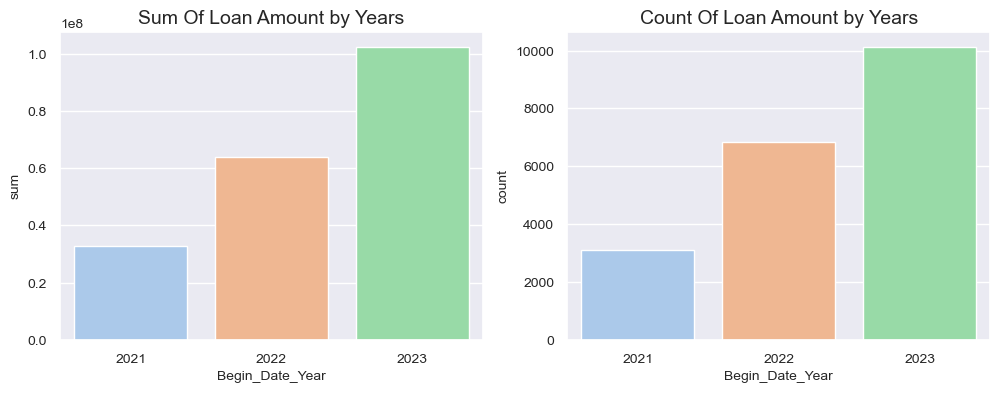

In [90]:
fig, axes = plt.subplots(1,2, figsize = (12, 4))

sns.barplot(ax = axes[0], data=begin_date_yearly_pivot, x='Begin_Date_Year', y='sum', palette='pastel')
sns.barplot(ax = axes[1], data=begin_date_yearly_pivot, x='Begin_Date_Year', y='count', palette='pastel')

axes[0].set_title('Sum Of Loan Amount by Years')
axes[1].set_title('Count Of Loan Amount by Years')

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

plt.show()

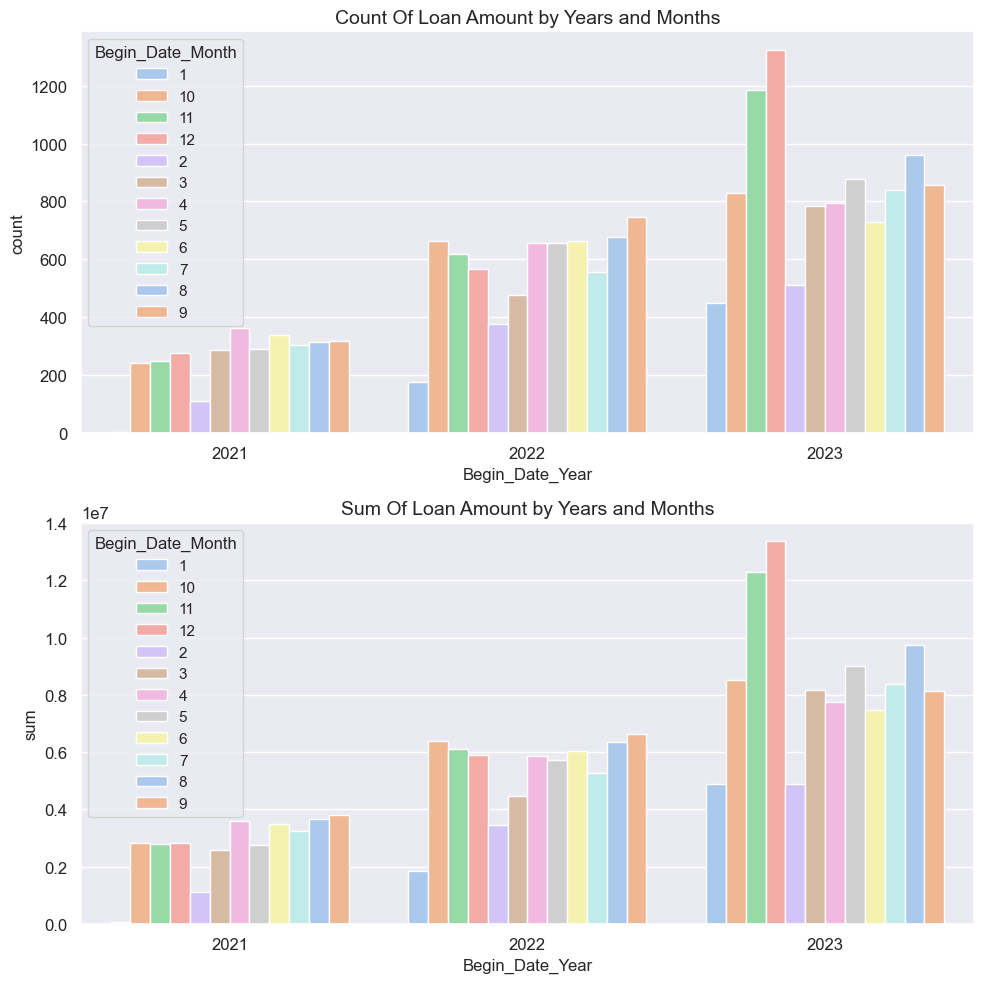

In [97]:
fig, axes = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(ax = axes[0], data=begin_date_monthly_pivot, x='Begin_Date_Year', y='count', hue='Begin_Date_Month', palette='pastel')
sns.barplot(ax = axes[1], data=begin_date_monthly_pivot, x='Begin_Date_Year', y='sum', hue='Begin_Date_Month', palette='pastel')

axes[0].set_title('Count Of Loan Amount by Years and Months')
axes[1].set_title('Sum Of Loan Amount by Years and Months')

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

plt.tight_layout()
plt.show()

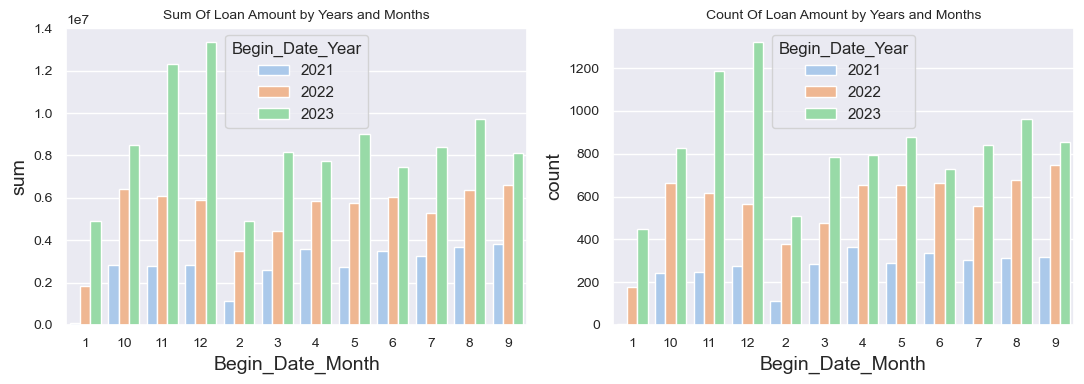

In [101]:
fig, axes = plt.subplots(1,2, figsize = (11, 4))

sns.barplot(ax = axes[0], data=begin_date_monthly_pivot, x='Begin_Date_Month', y='sum', hue='Begin_Date_Year', palette='pastel')
sns.barplot(ax = axes[1], data=begin_date_monthly_pivot, x='Begin_Date_Month', y='count', hue='Begin_Date_Year', palette='pastel')

plt.rcParams.update({
    'axes.titlesize': 10,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

axes[0].set_title('Sum Of Loan Amount by Years and Months')
axes[1].set_title('Count Of Loan Amount by Years and Months')

plt.tight_layout()
plt.show()

## 2.7 Active & non-active customer distribution by product names

In [103]:
def conditions(s):
    if (s['REMAIN_AMOUNT'] > 0):
        return 1
    else:
        return 0
    
df['Active_Loan'] = df.apply(conditions, axis=1)
df.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,Age,Loan_Period_Months,Begin_Date_Year,Begin_Date_Month,Active_Loan
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022,37,36,2021,5,1
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023,44,45,2021,6,0
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025,24,36,2021,9,0
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026,34,36,2021,9,0
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027,32,36,2021,9,0


In [104]:
grouped = df.groupby(['PRODUCT_NAME', 'Active_Loan']).size().unstack()
grouped.columns = ['Non-Active Customers', 'Active Customers']
grouped['Total Customers'] = grouped['Non-Active Customers'] + grouped['Active Customers']
grouped.loc['Total'] = grouped.sum()
grouped

,Non-Active Customers,Active Customers,Total Customers
PRODUCT_NAME,,,
İstehlak kredit (Cash),7257,7064,14321
İstehlak kredit - Online,1319,3666,4985
İstehlak krediti,22,21,43
Əmanətçi krediti,223,502,725
Total,8821,11253,20074


In [105]:
grouped.reset_index(inplace=True)
grouped

,PRODUCT_NAME,Non-Active Customers,Active Customers,Total Customers
0,İstehlak kredit (Cash),7257,7064,14321
1,İstehlak kredit - Online,1319,3666,4985
2,İstehlak krediti,22,21,43
3,Əmanətçi krediti,223,502,725
4,Total,8821,11253,20074


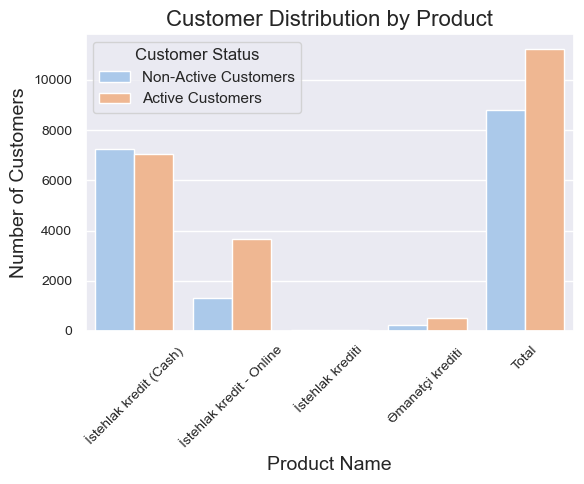

In [116]:
df_melted = grouped.melt(id_vars=['PRODUCT_NAME'], value_vars=['Non-Active Customers', 'Active Customers'],
                    var_name='Customer_Status', value_name='Count')

plt.figure(figsize=(6, 5))
sns.barplot(data=df_melted, x='PRODUCT_NAME', y='Count', hue='Customer_Status', palette='pastel')

plt.title('Customer Distribution by Product', fontsize=16)
plt.xlabel('Product Name')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

# Part 3 - Insight Finding

In [226]:
loan_data = df.copy()

In [227]:
loan_data['Loan_Period_Months'] = ((loan_data['END_DATE'] - loan_data['BEGIN_DATE']).dt.days // 30)

loan_data.head()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,Age,Loan_Period_Months,Begin_Date_Year,Begin_Date_Month,Active_Loan,Age_Group
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.8,GB,994758000022,37,36,2021,5,1,35-40
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.0,GB,994758000023,44,45,2021,6,0,40-45
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.0,GB,994758000025,24,36,2021,9,0,20-25
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758000026,34,36,2021,9,0,30-35
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.0,GB,994758000027,32,36,2021,9,0,30-35


In [228]:
loan_data['Age_Group'] = pd.cut(loan_data['Age'], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 120], 
                                labels=["18-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75+"])

q = loan_data['INTEREST_RATE'].quantile(0.99)
loan_data = loan_data[loan_data['INTEREST_RATE']<q]

q1 = loan_data['INTEREST_RATE'].quantile(0.01)
loan_data = loan_data[loan_data['INTEREST_RATE']>q1]

q2 = loan_data['AMOUNT'].quantile(0.99)
loan_data = loan_data[loan_data['AMOUNT']<q2]

q3 = loan_data['REMAIN_AMOUNT'].quantile(0.99)
loan_data = loan_data[loan_data['REMAIN_AMOUNT']<q3]

print(q)
print(q1)
print(q2)
print(q3)

22.3
9.9
38000.0
27000.2071


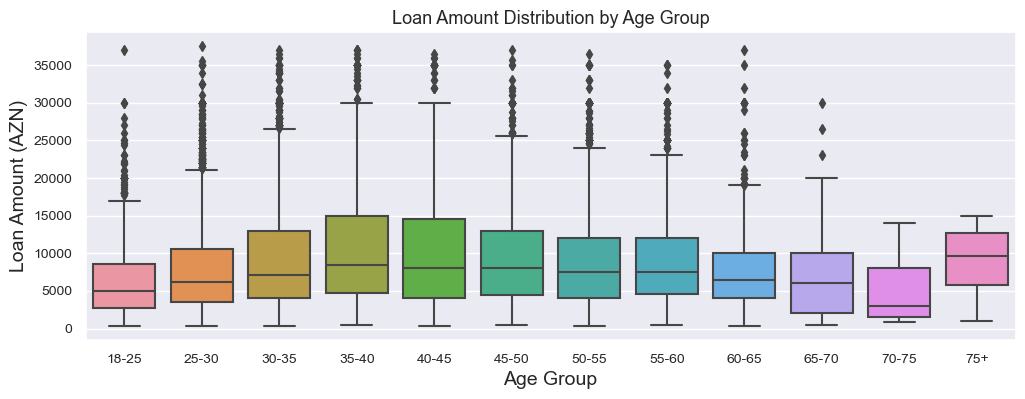

35-40: Min = 400.0,  Q1 = 4700.0,  Median = 8500.0,  Q3 = 15000.0 Max = 37000.0
40-45: Min = 310.0,  Q1 = 4000.0,  Median = 8000.0,  Q3 = 14575.0 Max = 36500.0
18-25: Min = 300.0,  Q1 = 2700.0,  Median = 5000.0,  Q3 = 8525.0 Max = 37000.0
30-35: Min = 300.0,  Q1 = 4000.0,  Median = 7150.0,  Q3 = 13000.0 Max = 37000.0
45-50: Min = 500.0,  Q1 = 4500.0,  Median = 8000.0,  Q3 = 13000.0 Max = 37000.0
25-30: Min = 300.0,  Q1 = 3500.0,  Median = 6200.0,  Q3 = 10537.5 Max = 37500.0
50-55: Min = 300.0,  Q1 = 4000.0,  Median = 7500.0,  Q3 = 12000.0 Max = 36500.0
55-60: Min = 400.0,  Q1 = 4537.5,  Median = 7500.0,  Q3 = 12000.0 Max = 35000.0
60-65: Min = 300.0,  Q1 = 4000.0,  Median = 6500.0,  Q3 = 10000.0 Max = 37000.0
65-70: Min = 400.0,  Q1 = 2000.0,  Median = 6000.0,  Q3 = 10000.0 Max = 30000.0
70-75: Min = 800.0,  Q1 = 1500.0,  Median = 3000.0,  Q3 = 8000.0 Max = 14000.0
75+: Min = 1000.0,  Q1 = 5725.0,  Median = 9650.0,  Q3 = 12750.0 Max = 15000.0


In [229]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x='Age_Group', y='AMOUNT', data=loan_data)
plt.title('Loan Amount Distribution by Age Group', fontsize=13)
plt.xlabel('Age Group')
plt.ylabel('Loan Amount (AZN)')
plt.show()

for category in loan_data['Age_Group'].unique():
    values = loan_data[loan_data['Age_Group'] == category]['AMOUNT']
    
    min_val = values.min()
    q1 = values.quantile(0.25)
    median_val = values.median()
    q3 = values.quantile(0.75)
    max_val = values.max()

    print(f"{category}: Min = {min_val},  Q1 = {q1},  Median = {median_val},  Q3 = {q3} Max = {max_val}")

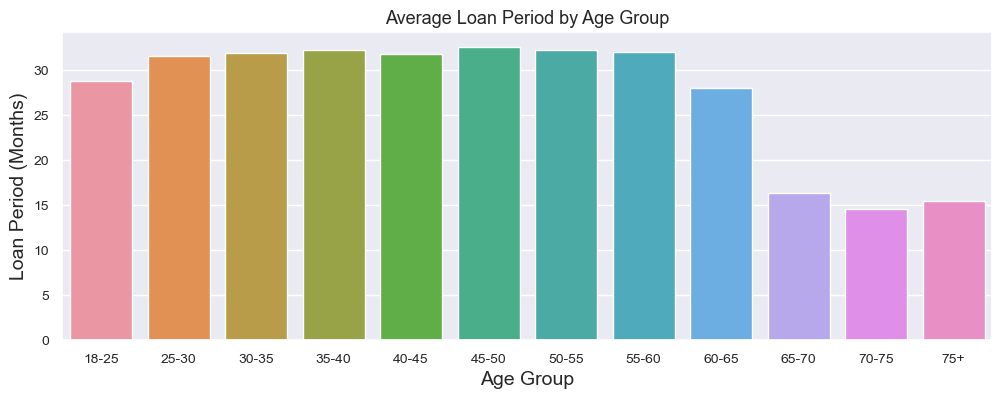

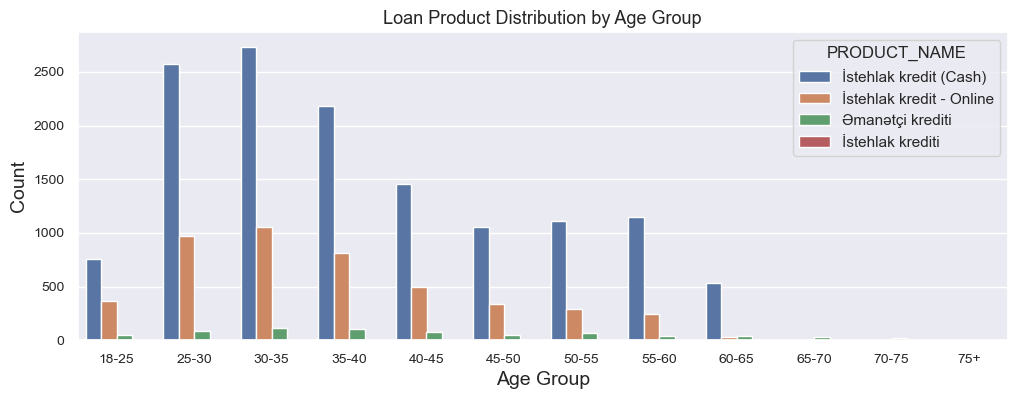

In [230]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Age_Group', y='Loan_Period_Months', data=loan_data, ci=None)
plt.title('Average Loan Period by Age Group', fontsize=13)
plt.xlabel('Age Group')
plt.ylabel('Loan Period (Months)')
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(x='Age_Group', hue='PRODUCT_NAME', data=loan_data)
plt.title('Loan Product Distribution by Age Group', fontsize=13)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [231]:
age_product_group = loan_data.groupby(['Age_Group', 'PRODUCT_NAME']).agg({'AMOUNT': 'sum'}).reset_index()

top_loan_segments = age_product_group.sort_values(by='AMOUNT', ascending=False).head(3)

top_loan_segments

,Age_Group,PRODUCT_NAME,AMOUNT
8,30-35,İstehlak kredit (Cash),26454521.0
12,35-40,İstehlak kredit (Cash),23861824.0
4,25-30,İstehlak kredit (Cash),21594012.0


### 1. **Customer Segmentations and Their Profiles:**
   - **35-40 Age Group**: This group tends to take higher loan amounts, often opting for longer loan periods. They show a strong preference for the "İstehlak kredit (Cash)" product.
   - **18-25 Age Group**: Typically takes smaller loans with shorter durations. They are also inclined towards the "İstehlak kredit (Cash)" product.
   - **45-50 Age Group**: This group maintains a steady demand for loans, with moderate loan amounts and periods.

### 2. **Top 3 Customer Segments to Target for Increased Sales:**
   - **30-40 Age Group (İstehlak kredit - Cash)**: Focus on this segment with personalized loan offers and longer repayment terms.
   - **18-30 Age Group (İstehlak kredit - Cash)**: While they take smaller loans, this segment can be nurtured with special offers, especially around life events (e.g., weddings, starting a family).
   - **40-50 Age Group (Various Products)**: Engage this group with tailored financial planning services, potentially upselling them into larger loans.

### 3. **New Bank Product Suggestion:**
   - **"Youth Empowerment Loan"**: A specialized loan product targeted at the 20-30 age group. This product could offer lower interest rates, longer repayment terms, and flexible conditions tailored to life events like education, weddings, or starting a business.
   - **"Family Expansion Loan"**: A product aimed at the 30-40 age group, offering higher loan amounts with longer terms, catering to those looking to buy property, renovate homes, or cover other significant life expenses.